In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

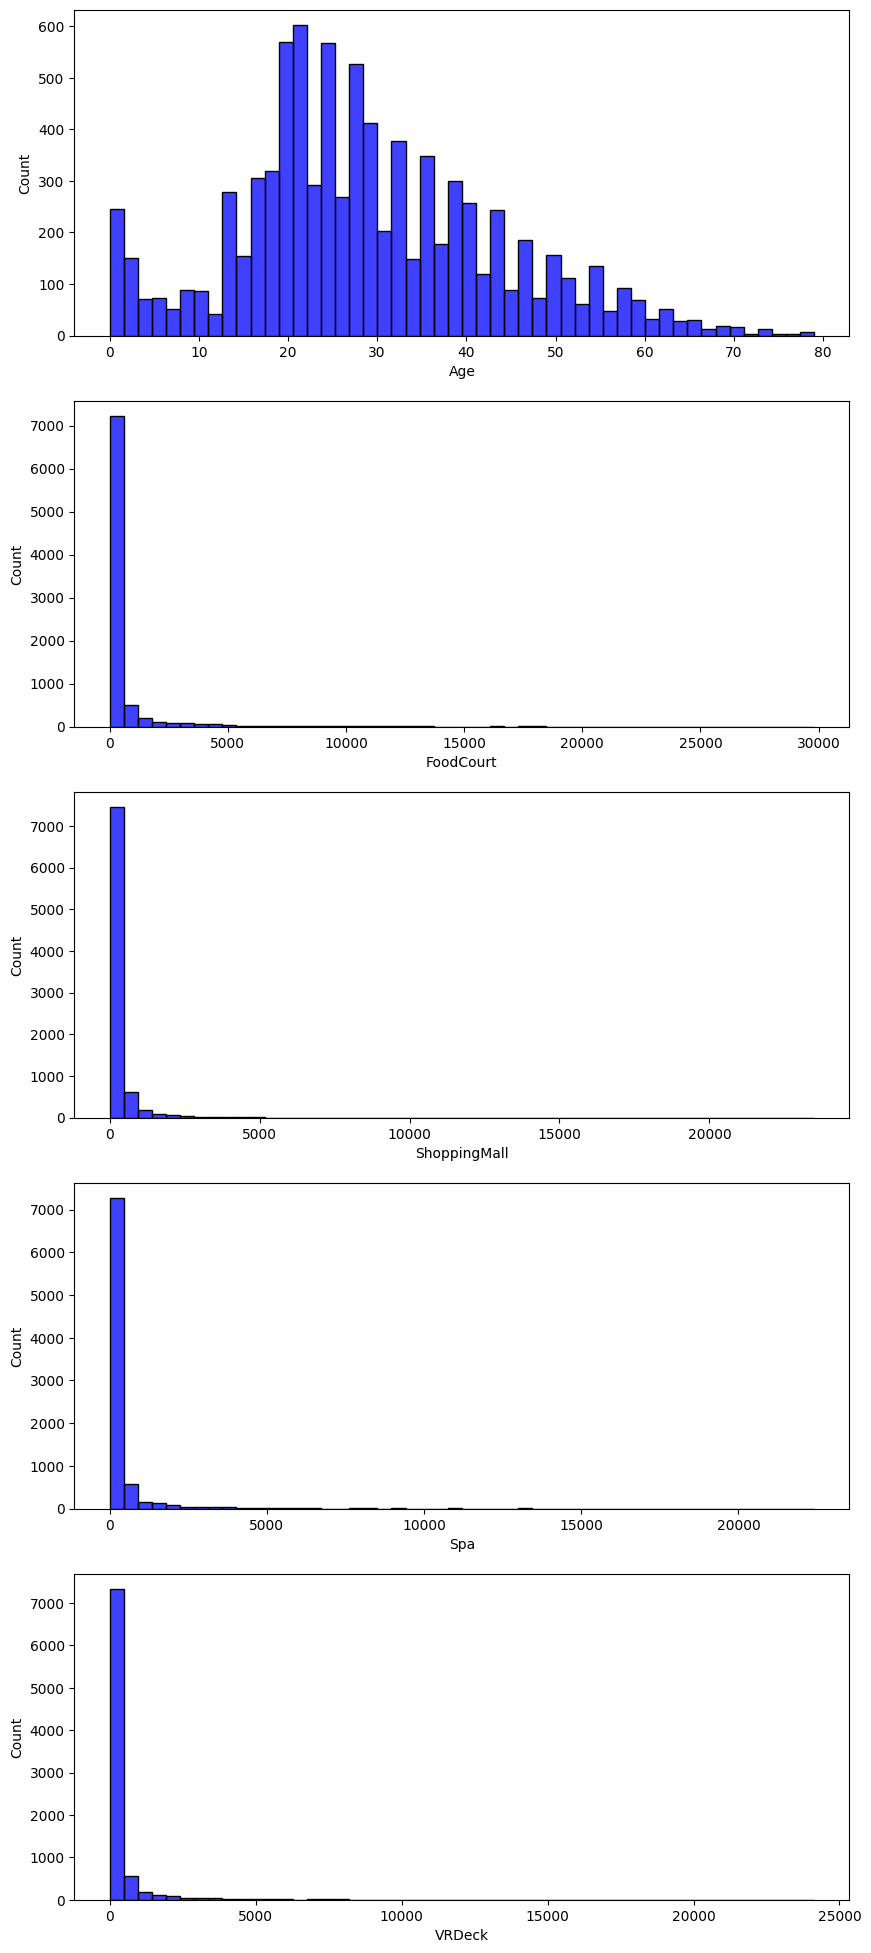

In [88]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [91]:
df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Name            200
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
newdf = df.drop("Name", axis='columns')
newdf.head()
newdf.shape

(8693, 13)

In [6]:
newdf.isna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
clean_df = newdf.dropna()

In [8]:
clean_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
clean_df.shape

(6764, 13)

In [10]:
print(f'Any duplicates? {clean_df.duplicated().values.any()}')

Any duplicates? False


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


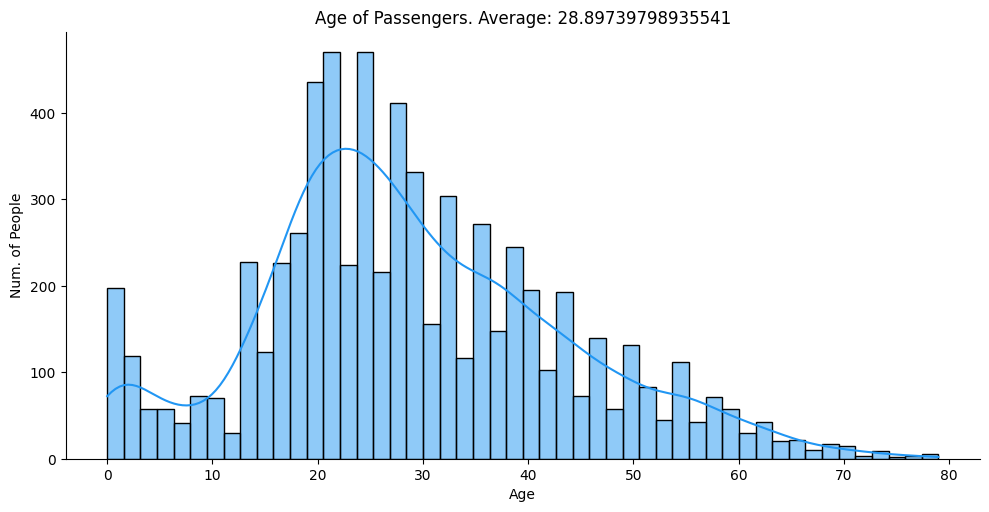

In [11]:
sns.displot(clean_df['Age'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Age of Passengers. Average: {(clean_df.Age.mean())}')
plt.xlabel('Age')
plt.ylabel('Num. of People')

plt.show()

In [12]:
transported = clean_df.loc[clean_df['Transported']== True]

In [13]:
transported.shape

(3401, 13)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


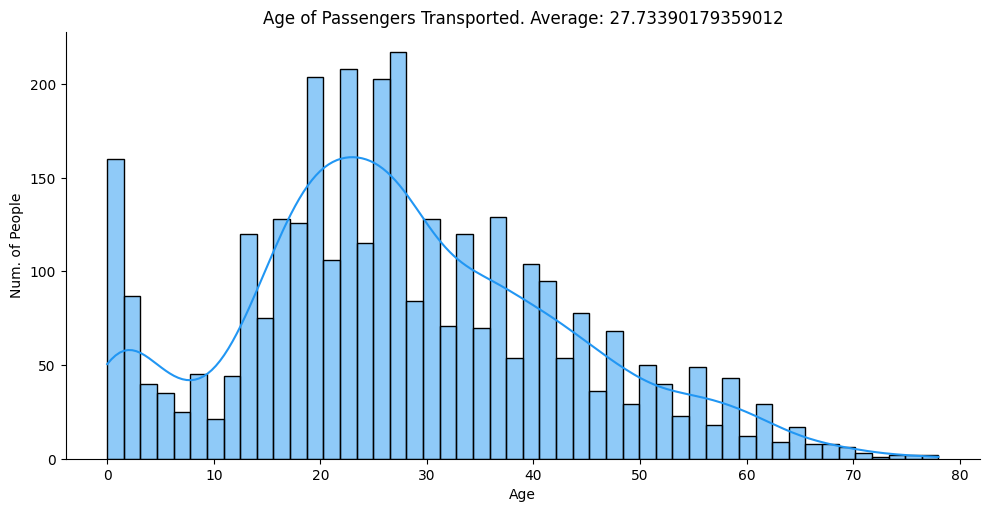

In [14]:
sns.displot(transported['Age'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Age of Passengers Transported. Average: {(transported.Age.mean())}')
plt.xlabel('Age')
plt.ylabel('Num. of People')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


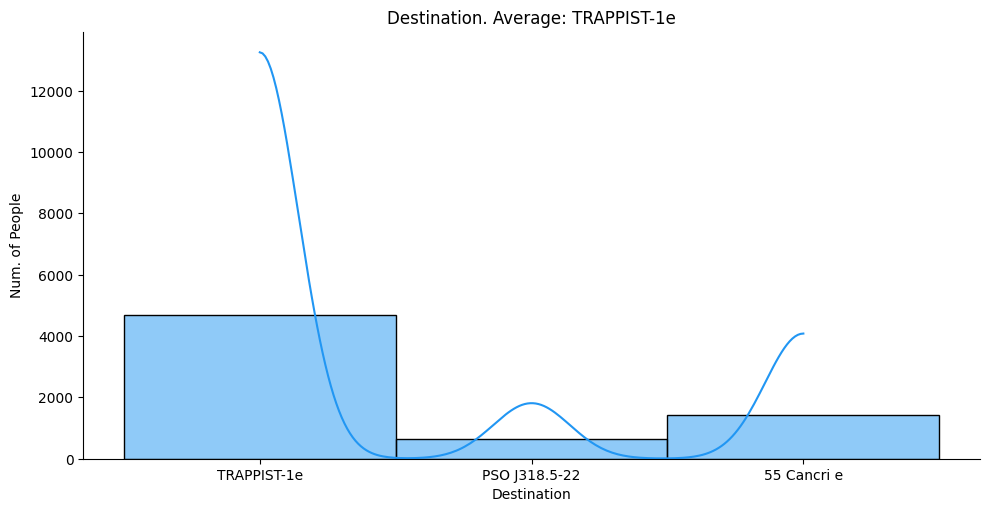

In [15]:
sns.displot(clean_df['Destination'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Destination. Average: {(clean_df.Destination.max())}')
plt.xlabel('Destination')
plt.ylabel('Num. of People')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


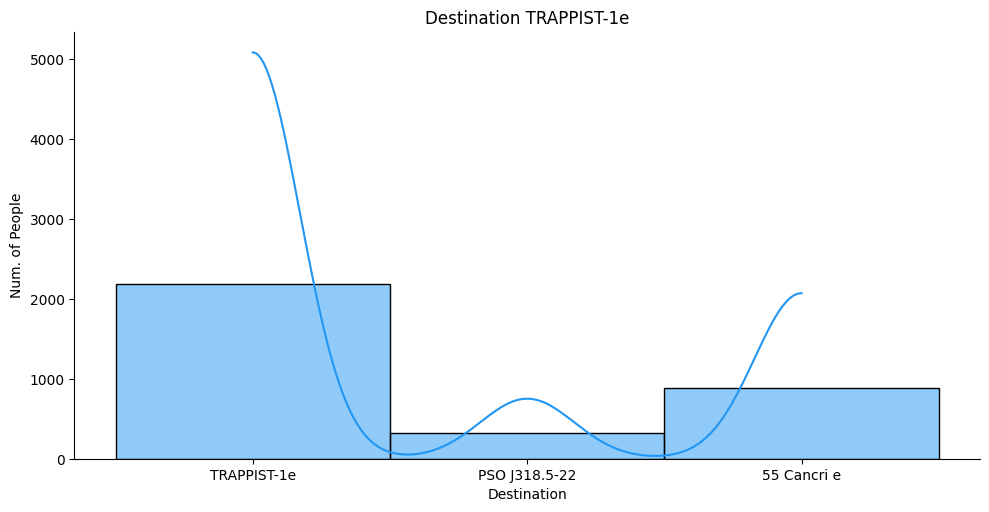

In [16]:
sns.displot(transported['Destination'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Destination {(transported.Destination.max())}')
plt.xlabel('Destination')
plt.ylabel('Num. of People')

plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


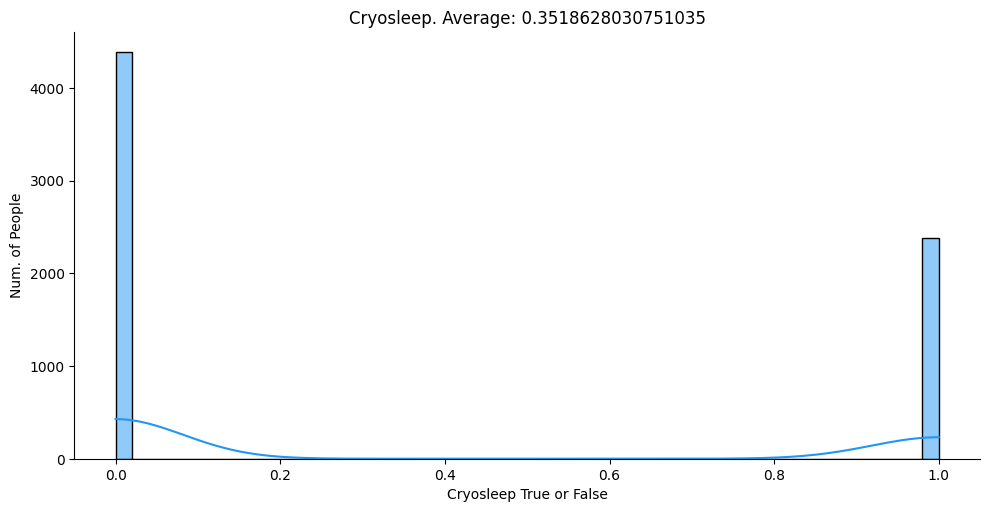

In [17]:
sns.displot(clean_df['CryoSleep'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Cryosleep. Average: {(clean_df.CryoSleep.mean())}')
plt.xlabel('Cryosleep True or False')
plt.ylabel('Num. of People')

plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


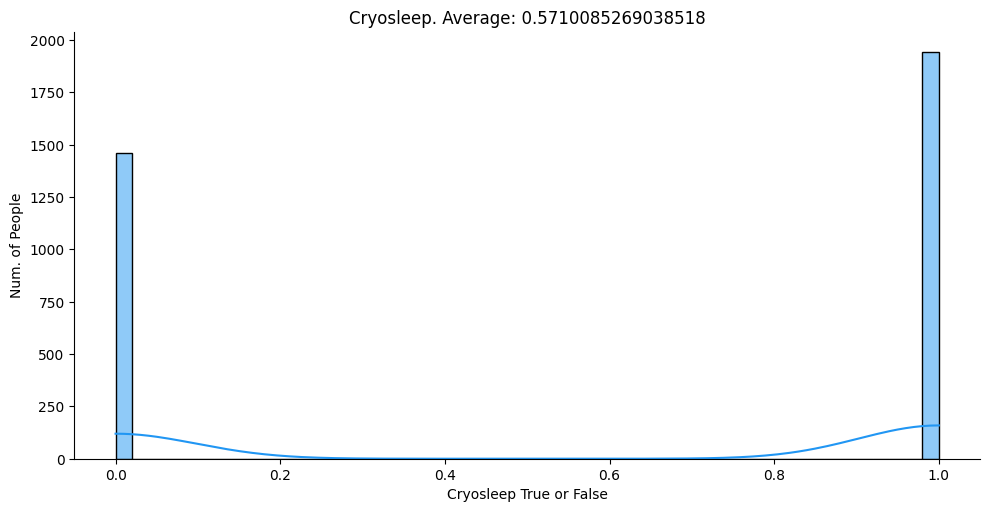

In [18]:
sns.displot(transported['CryoSleep'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Cryosleep. Average: {(transported.CryoSleep.mean())}')
plt.xlabel('Cryosleep True or False')
plt.ylabel('Num. of People')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


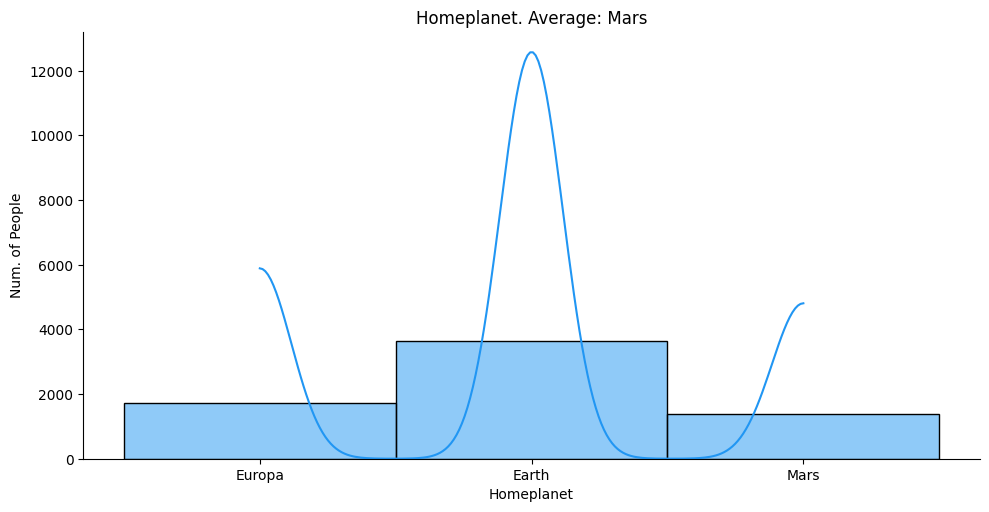

In [19]:
sns.displot(clean_df['HomePlanet'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Homeplanet. Average: {(clean_df.HomePlanet.max())}')
plt.xlabel('Homeplanet')
plt.ylabel('Num. of People')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


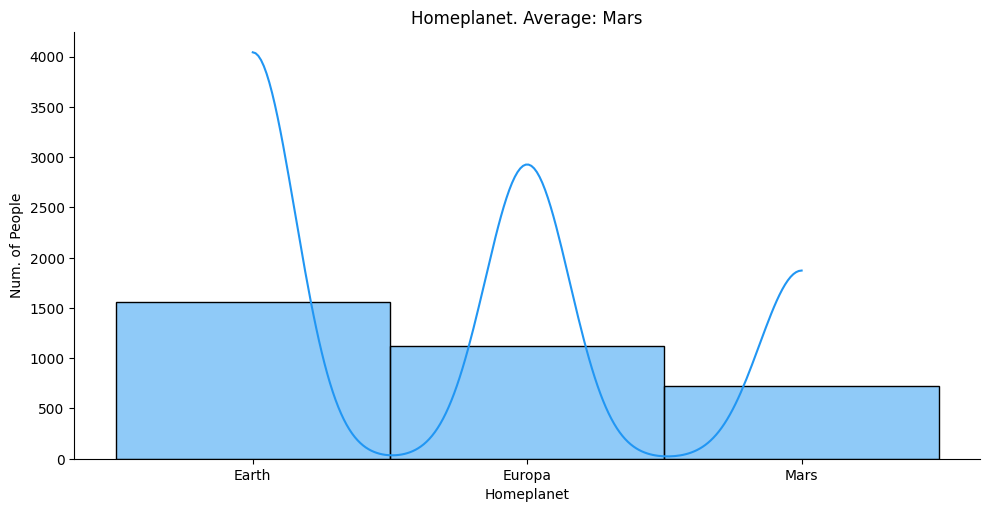

In [20]:
sns.displot(transported['HomePlanet'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Homeplanet. Average: {(transported.HomePlanet.max())}')
plt.xlabel('Homeplanet')
plt.ylabel('Num. of People')

plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


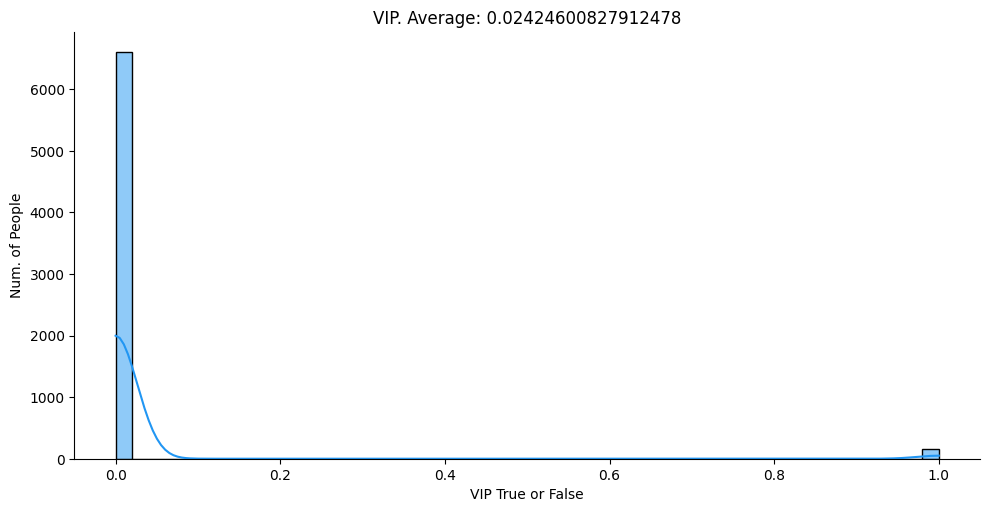

In [21]:
sns.displot(clean_df['VIP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'VIP. Average: {(clean_df.VIP.mean())}')
plt.xlabel('VIP True or False')
plt.ylabel('Num. of People')

plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


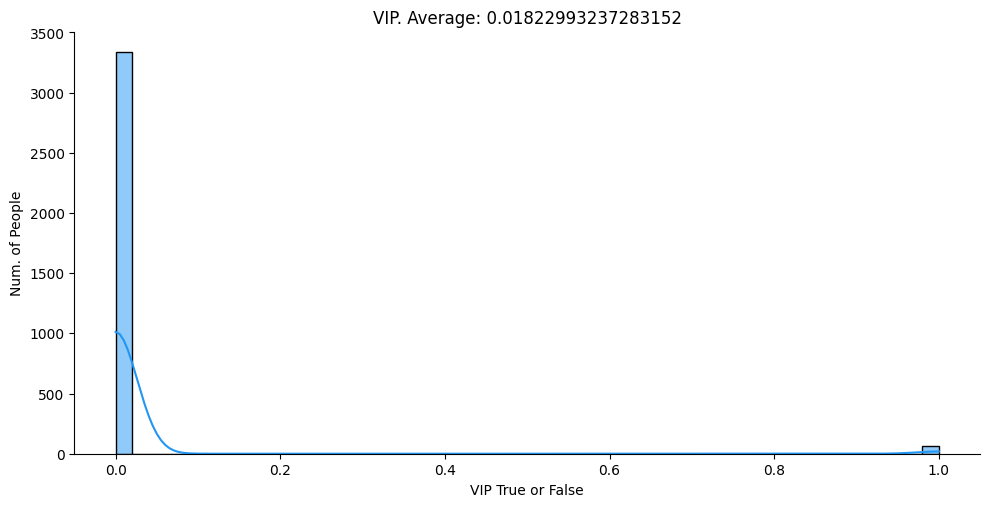

In [22]:
sns.displot(transported['VIP'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'VIP. Average: {(transported.VIP.mean())}')
plt.xlabel('VIP True or False')
plt.ylabel('Num. of People')

plt.show()

**Comparing Amount Spent of all Passengers to Passengers transported**


In [23]:
clean_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [24]:
clean_df.iloc[:,7:12]


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


In [25]:
sum = clean_df.iloc[:,7:12].sum(axis = 1, numeric_only = True)

In [26]:
clean_df.insert(len(clean_df.columns),"Sum2", sum)

In [27]:
clean_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Sum2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


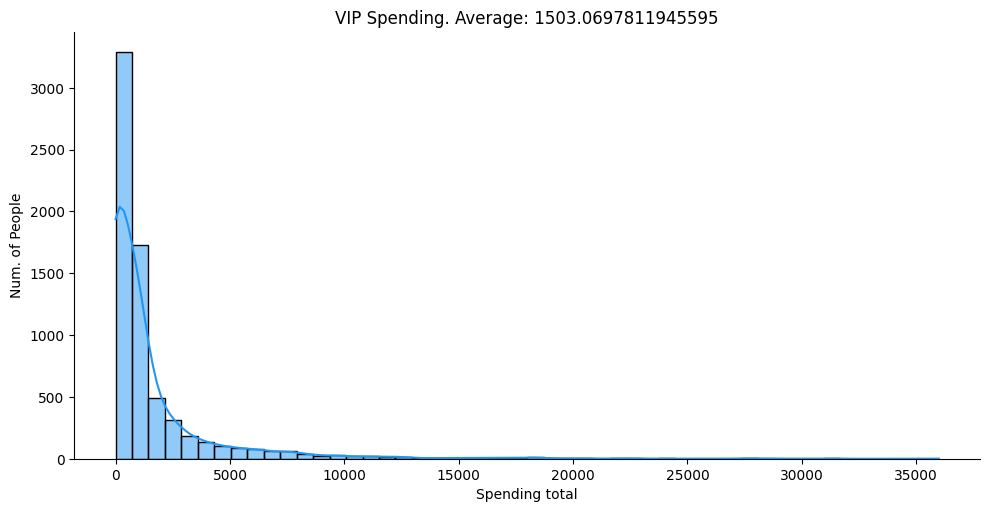

In [28]:
sns.displot(clean_df['Sum2'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'VIP Spending. Average: {(clean_df.Sum2.mean())}')
plt.xlabel('Spending total')
plt.ylabel('Num. of People')

plt.show()

In [29]:
transported = clean_df.loc[clean_df['Transported']== True]

In [30]:
transported

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Sum2
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,774.0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,1584.0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,True,0.0
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,True,992.0
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


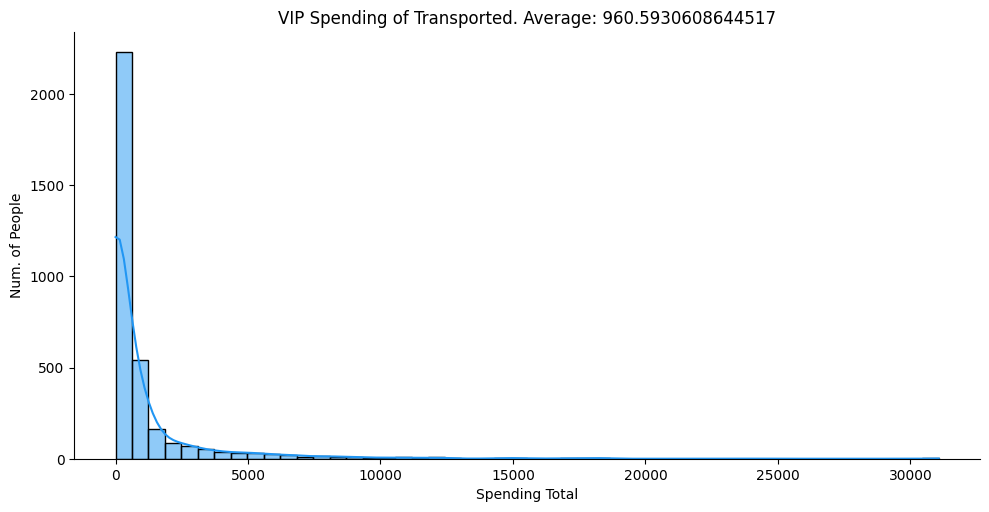

In [31]:
sns.displot(transported['Sum2'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'VIP Spending of Transported. Average: {(transported.Sum2.mean())}')
plt.xlabel('Spending Total')
plt.ylabel('Num. of People')

plt.show()

In [32]:
location = clean_df.loc[:, ['CryoSleep', 'Cabin','Transported']]

In [33]:
location.head()

,CryoSleep,Cabin,Transported
0,False,B/0/P,False
1,False,F/0/S,True
2,False,A/0/S,False
3,False,A/0/S,False
4,False,F/1/S,True


In [34]:
location.dtypes

CryoSleep      object
Cabin          object
Transported      bool
dtype: object

In [35]:
x = 0
lst = []

for index, row in location.loc[:,["Cabin"]].iterrows():
    lst.append(row['Cabin'])

newlst = [item[0:1] for item in lst]
location.insert(len(location.columns),"Cabin2", newlst)

In [36]:
location.head()

,CryoSleep,Cabin,Transported,Cabin2
0,False,B/0/P,False,B
1,False,F/0/S,True,F
2,False,A/0/S,False,A
3,False,A/0/S,False,A
4,False,F/1/S,True,F


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


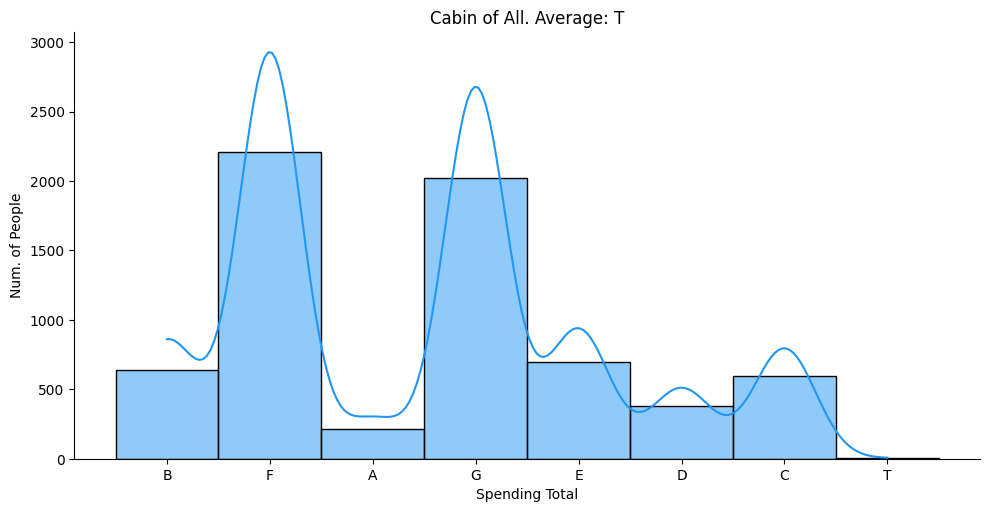

In [37]:
sns.displot(location['Cabin2'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'Cabin of All. Average: {(location.Cabin2.max())}')
plt.xlabel('Spending Total')
plt.ylabel('Num. of People')

plt.show()

In [38]:
Transported_Cabin = location.loc[location['Transported'] == True]

In [39]:
Transported_Cabin.head()

,CryoSleep,Cabin,Transported,Cabin2
1,False,F/0/S,True,F
4,False,F/1/S,True,F
5,False,F/0/P,True,F
6,False,F/2/S,True,F
8,False,F/3/S,True,F


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


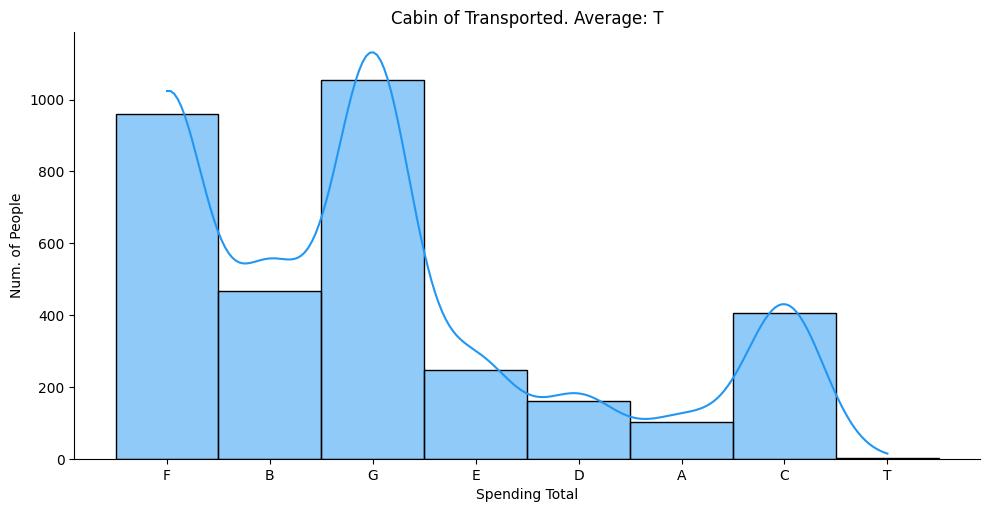

In [40]:
sns.displot(Transported_Cabin['Cabin2'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'Cabin of Transported. Average: {(Transported_Cabin.Cabin2.max())}')
plt.xlabel('Spending Total')
plt.ylabel('Num. of People')

plt.show()

In [41]:
CryoSleep = location.loc[location['CryoSleep'] == True]
CryoSleep

,CryoSleep,Cabin,Transported,Cabin2
9,True,B/1/P,True,B
18,True,F/5/P,True,F
21,True,E/0/S,False,E
22,True,E/0/S,False,E
36,True,D/1/S,True,D
...,...,...,...,...
8678,True,E/607/S,True,E
8679,True,E/607/S,True,E
8680,True,G/1505/P,True,G
8681,True,G/1497/S,True,G


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


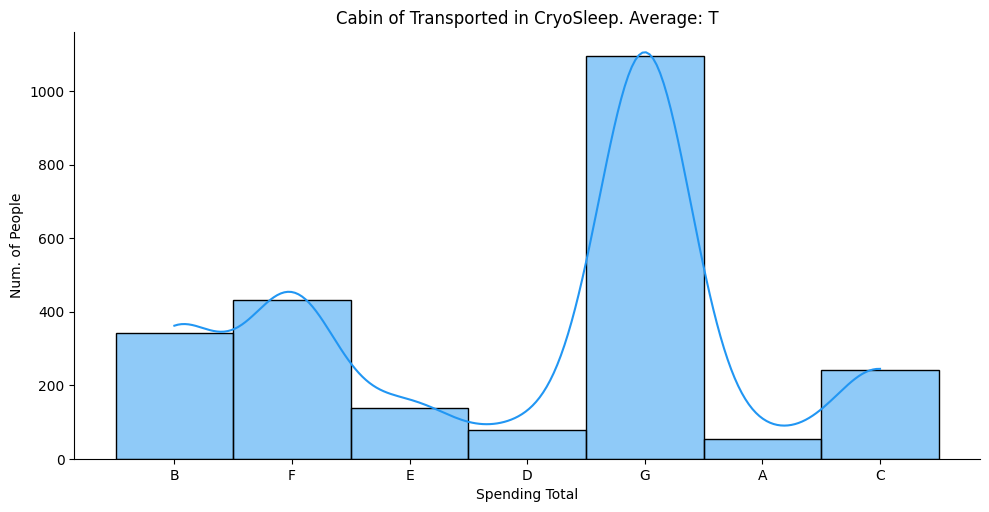

In [42]:
sns.displot(CryoSleep['Cabin2'],
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')
plt.title(f'Cabin of Transported in CryoSleep. Average: {(Transported_Cabin.Cabin2.max())}')
plt.xlabel('Spending Total')
plt.ylabel('Num. of People')

plt.show()

In [51]:
CryoSleep

,CryoSleep,Cabin,Transported,Cabin2
9,True,B/1/P,True,B
18,True,F/5/P,True,F
21,True,E/0/S,False,E
22,True,E/0/S,False,E
36,True,D/1/S,True,D
...,...,...,...,...
8678,True,E/607/S,True,E
8679,True,E/607/S,True,E
8680,True,G/1505/P,True,G
8681,True,G/1497/S,True,G


In [53]:
CryoSleep2 = CryoSleep.drop("Cabin", axis='columns')
Cabin_in_CryoSleep = CryoSleep2.groupby('Cabin2').sum()
Cabin_in_CryoSleep

,CryoSleep,Transported
Cabin2,,
A,53,50
B,342,339
C,241,239
D,79,78
E,139,89


In [55]:
CryoSleep2

,CryoSleep,Transported,Cabin2
9,True,True,B
18,True,True,F
21,True,False,E
22,True,False,E
36,True,True,D
...,...,...,...
8678,True,True,E
8679,True,True,E
8680,True,True,G
8681,True,True,G


In [60]:
CryoSleep2.CryoSleep.value_counts()

CryoSleep
True    2380
Name: count, dtype: int64

In [63]:
Cabin_in_CryoSleep

,CryoSleep,Transported
Cabin2,,
A,53,50
B,342,339
C,241,239
D,79,78
E,139,89
F,431,425
G,1095,722


In [78]:
x = 0
percent = []

for index, row in Cabin_in_CryoSleep.iterrows():
    percent.append((row['Transported']/row['CryoSleep'])*100)
print(percent)





[94.33962264150944, 99.12280701754386, 99.1701244813278, 98.73417721518987, 64.02877697841727, 98.60788863109049, 65.93607305936074]


In [86]:
Cabin_in_CryoSleep2 = Cabin_in_CryoSleep.insert(len(Cabin_in_CryoSleep.columns),"Percent Transported", percent)

ValueError: cannot insert Percent Transported, already exists

In [83]:
Cabin_in_CryoSleep

,CryoSleep,Transported,Percent Transported
Cabin2,,,
A,53,50,94.339623
B,342,339,99.122807
C,241,239,99.170124
D,79,78,98.734177
E,139,89,64.028777
F,431,425,98.607889
G,1095,722,65.936073


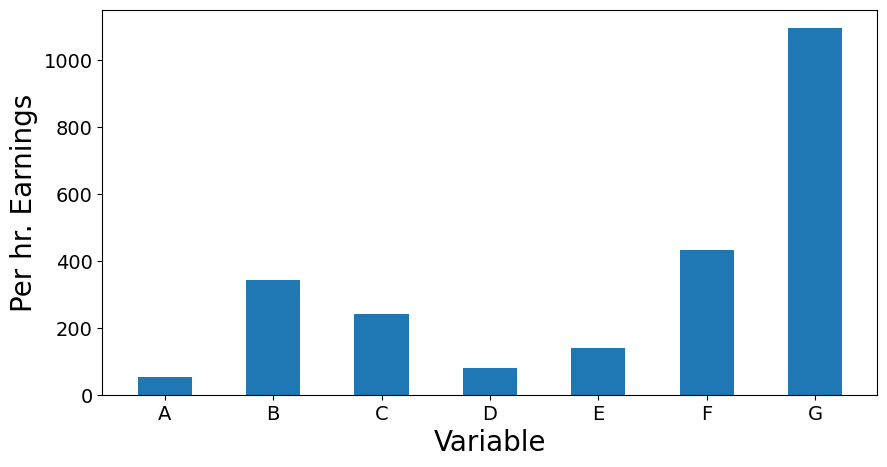

In [68]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Cabin', fontsize=20)
plt.ylabel('Number of People', fontsize=20)

plt.bar(Cabin_in_CryoSleep.index, Cabin_in_CryoSleep['CryoSleep'], width = 0.5)

plt.show()

In [ ]:
x_axis = Cabin_in_CryoSleep.index
y_axis = Cabin_in_CryoSleep.columns
plt.plot(x_value, y_value)

In [69]:
x = np.arange(len(Cabin_in_CryoSleep.index))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
x

array([0, 1, 2, 3, 4, 5, 6])

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

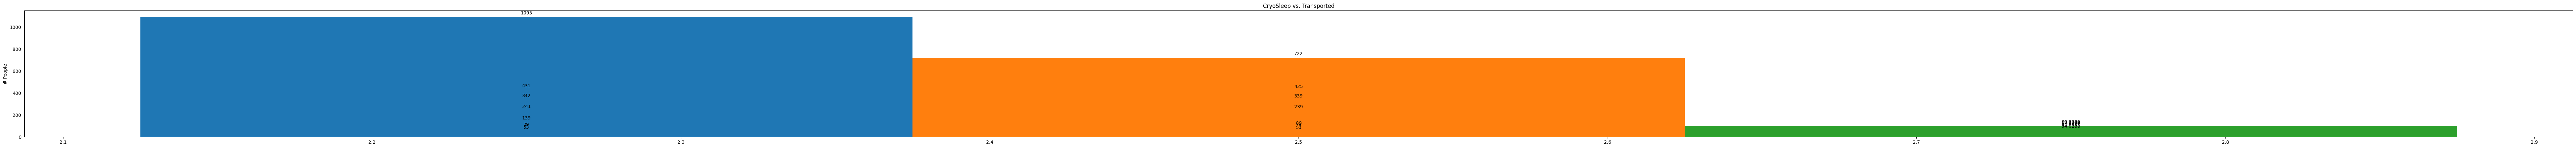

In [85]:
fig, ax = plt.subplots(figsize=(100,5))


for attribute, measurement in Cabin_in_CryoSleep.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# People')
ax.set_title('CryoSleep vs. Transported')
ax.set_xticks(x + width, Cabin_in_CryoSleep.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)


plt.show()
